In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
np.random.seed(0)

In [2]:
data1_path = 'data/telco/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data2_path = 'data/adult/adult.data'
data2_extra = 'data/adult/adult.test'
data3_path = 'data/creditcardfraud/creditcard.csv'

In [3]:
df2_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
# df1 = pd.read_csv(data1_path)
# df2 = pd.read_csv(data2_path,  names=df2_headers, index_col=False)
df3 = pd.read_csv(data3_path)

# Dataset 3: Credit Card Fraud Detection

In [4]:
df3.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df3.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
df3['scaled_amount'] = robust_scaler.fit_transform(df3['Amount'].values.reshape(-1,1))
df3['scaled_time'] = robust_scaler.fit_transform(df3['Time'].values.reshape(-1,1))
df3.drop(['Time','Amount'], axis=1, inplace=True)

In [7]:
print(f'Non-Frauds percentage: {round(df3["Class"].value_counts()[0]/len(df3) * 100,2)}% of the dataset')
print(f'Frauds percentage: {round(df3["Class"].value_counts()[1]/len(df3) * 100,2)}% of the dataset')

Non-Frauds percentage: 99.83% of the dataset
Frauds percentage: 0.17% of the dataset


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df3.drop('Class', axis=1)
y = df3['Class']

In [9]:
# shuffle df3
df3 = df3.sample(frac=1)
fraud_df = df3.loc[df3['Class'] == 1]
non_fraud_df = df3.loc[df3['Class'] == 0][:492]
new_df = pd.concat([fraud_df, non_fraud_df])
new_df = new_df.sample(frac=1, random_state=42)
print(f'Frauds percentage: {round(new_df["Class"].value_counts()[1]/len(new_df) * 100,2)}% of the dataset')
print(f'Non-Frauds percentage: {round(new_df["Class"].value_counts()[0]/len(new_df) * 100,2)}% of the dataset')
new_df.head()

Frauds percentage: 50.0% of the dataset
Non-Frauds percentage: 50.0% of the dataset


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
178066,-2.929579,-2.630494,1.775473,-2.310854,-0.490392,-0.042834,-1.674939,0.399247,-0.567327,0.746205,...,-0.294464,-0.455937,0.479731,0.443785,-0.255994,-1.050257,0.587969,0,-0.028645,0.455480
181966,-0.769172,1.342212,-2.171454,-0.151513,-0.648374,-0.973504,-1.706658,0.313745,-1.982302,-3.158127,...,-0.753591,-0.047113,0.358493,-0.287407,0.476506,0.250531,0.250987,1,0.251520,0.475898
265205,-0.161936,0.474341,-0.758422,-0.953533,0.751166,-1.570174,2.117030,-0.600490,0.069598,-0.299327,...,0.766910,0.028772,-0.039268,-0.383179,0.067253,0.177143,0.049525,0,1.353315,0.905685
144754,-0.670238,0.945206,0.610051,2.640065,-2.707775,1.952611,-1.624608,-5.229908,0.210202,-2.069904,...,1.436472,0.351542,0.648467,0.579681,0.075738,0.346717,0.282209,1,4.216726,0.019784
238222,-4.280584,1.421100,-3.908229,2.942946,-0.076205,-2.002526,-2.874155,-0.856005,0.963674,-3.235439,...,-0.907720,-0.680108,-0.349170,0.056276,-1.149923,-1.809886,0.723051,1,-0.292042,0.762344


<Axes: >

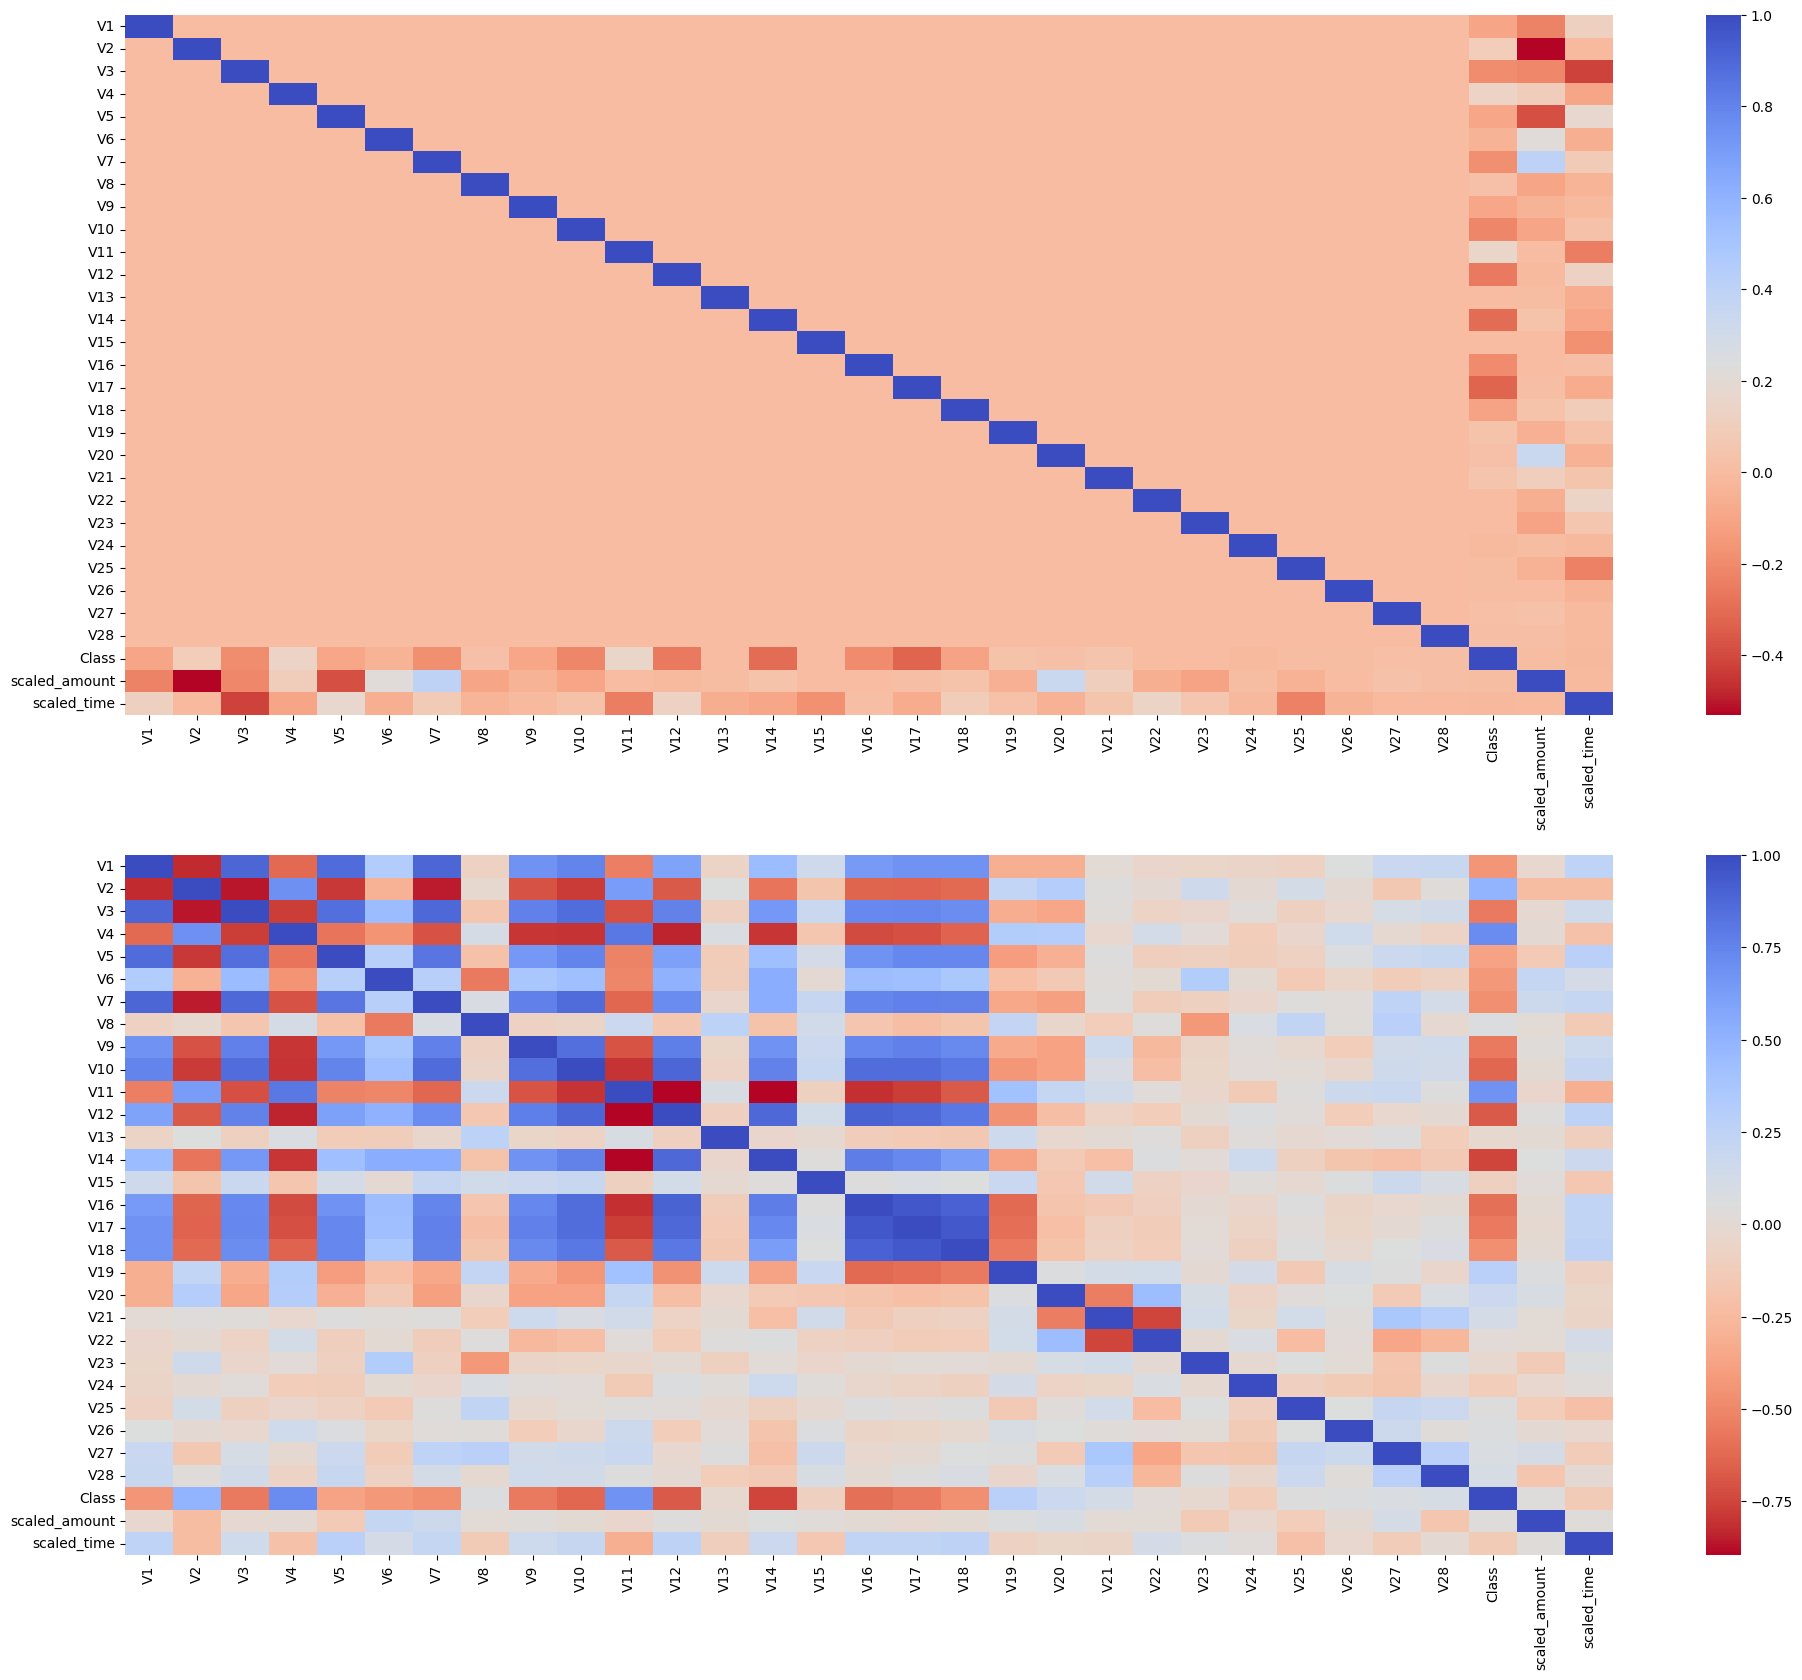

In [10]:
# plot correlation matrix before and after downsampling
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
# Entire DataFrame
corr = df3.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)

In [11]:
def robust_z_score_outlier_removal(df, column, threshold=3):
    median = df[column].median()
    mad = np.abs(df[column] - median).median()
    df[column] = np.clip(df[column], median - threshold*mad, median + threshold*mad)
    return df
# now remove outliers in each column V1 to V28
for i in range(1,29):
    new_df = robust_z_score_outlier_removal(new_df, f'V{i}')
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
178066,-2.929579,-2.630494,1.775473,-2.310854,-0.490392,-0.042834,-1.674939,0.399247,-0.567327,0.746205,...,-0.294464,-0.455937,0.479731,0.443785,-0.255994,-0.605201,0.413459,0,-0.028645,0.455480
181966,-0.769172,1.342212,-2.171454,-0.151513,-0.648374,-0.973504,-1.706658,0.313745,-1.982302,-3.158127,...,-0.753591,-0.047113,0.358493,-0.287407,0.476506,0.250531,0.250987,1,0.251520,0.475898
265205,-0.161936,0.474341,-0.758422,-0.953533,0.751166,-1.570174,2.117030,-0.600490,0.069598,-0.299327,...,0.766910,0.028772,-0.039268,-0.383179,0.067253,0.177143,0.049525,0,1.353315,0.905685
144754,-0.670238,0.945206,0.610051,2.640065,-2.707775,1.778587,-1.624608,-1.309626,0.210202,-2.069904,...,1.436472,0.351542,0.648467,0.579681,0.075738,0.346717,0.282209,1,4.216726,0.019784
238222,-4.280584,1.421100,-3.908229,2.942946,-0.076205,-2.002526,-2.874155,-0.856005,0.963674,-3.235439,...,-0.907720,-0.680108,-0.349170,0.056276,-0.912619,-0.605201,0.413459,1,-0.292042,0.762344


In [12]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 85   2]
 [  5 105]]
Accuracy Score: 0.9644670050761421
Precision Score: 0.9813084112149533
Recall Score: 0.9545454545454546
F1 Score: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        87
           1       0.98      0.95      0.97       110

    accuracy                           0.96       197
   macro avg       0.96      0.97      0.96       197
weighted avg       0.97      0.96      0.96       197



In [14]:
# test code
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# count positive and negative classes in training and testing sets
print(f'Positive class in training set: {sum(y_train==1)}')
print(f'Negative class in training set: {sum(y_train==0)}')
print(f'Positive class in testing set: {sum(y_test==1)}')
print(f'Negative class in testing set: {sum(y_test==0)}')

# Create a Logistic Regression classifier instance
lr = LogisticRegression(random_state=42)

ada_clf = AdaBoostClassifier(
    n_estimators=20,
)
# Train the model
ada_clf.fit(X_train, y_train)

# Make predictions
y_pred = ada_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1: {f1_score(y_test, y_pred):.2f}")


Positive class in training set: 382
Negative class in training set: 405
Positive class in testing set: 110
Negative class in testing set: 87
Accuracy: 0.93
Precision: 0.94
Recall: 0.95
F1: 0.94


In [15]:
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = np.sum([(-counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])
    return entropy

def InfoGain(data, split_attribute_name, target_name="class"):
    total_entropy = entropy(data[target_name])
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data[data[split_attribute_name] == vals[i]][target_name]) for i in range(len(vals))])
    information_gain = total_entropy - weighted_entropy
    return information_gain

def feature_selection(X, y, num_features=10):
    categorical_cols = []
    numerical_cols = []
    for col in X.columns[1:]:  # Note: Changed 'range(len(X.columns[1:]))' to 'X.columns[1:]'
        if X[col].nunique() == 2:
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
            
    print(f'Categorical columns: {categorical_cols}')
    print(f'Numerical columns: {numerical_cols}')

    # Combine X and y for information gain calculation
    data = X.copy()
    target = y.copy()
    target = pd.DataFrame(target)
    target.columns = ['class']
    data.reset_index(drop=True, inplace=True)
    target.reset_index(drop=True, inplace=True)
    data = pd.concat([data, target], axis=1)

    # Calculate information gain for each categorical column
    info_gains = {col: InfoGain(data, col, 'class') for col in categorical_cols}

    # Sort columns based on information gain and select top num_features
    top_categorical_features = sorted(info_gains, key=info_gains.get, reverse=True)[:num_features]

    return numerical_cols + top_categorical_features

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    p = np.round(sigmoid(np.dot(X, theta)))
    return p

class LogisticRegression:
    def __init__(self, lambda_=0):
        self.lambda_ = lambda_
        self.theta = None
    
    def lrCostFunction(self, X, y):
        m = y.size
        J = 0
        grad = np.zeros(self.theta.shape)
        
        h = sigmoid(np.dot(X, self.theta))
        # J = (1/m) * np.sum((-y * np.log(h)) - ((1-y) * np.log(1-h))) + ((self.lambda_/(2*m)) * np.sum(np.square(self.theta[1:])))
        grad = (1/m) * np.dot(X.T, (h-y))
        grad[1:] = grad[1:] + ((self.lambda_/m) * self.theta[1:])
        
        return J, grad
    
    def gradientDescent(self, X, y, alpha, num_iters):
        m = y.shape[0]
        self.theta = np.random.random_sample((X.shape[1], )) -0.5
        J_history = []
        
        for i in range(num_iters):
            J, grad = self.lrCostFunction(X, y)
            self.theta = self.theta - (alpha * grad)
            J_history.append(J)
            # Since this is a weak learner, stop as soon as more than 50% of the training examples are correctly classified
            p = predict(X, self.theta)
            err = np.sum(p != y)
            err = err / m
            thresh = min(np.sum(y==1), np.sum(y==0))/m
            if err < min(thresh, 0.45):
                break
            # if J <= 0.000001:
            #     break
        
        return self.theta, J_history

def AdaBoostClassifier(X, y, n_estimators=50, learner=LogisticRegression):
    N = X.shape[0]
    n_samples = int(N * 0.8)
    W = np.full(N, (1 / N))
    h = np.zeros(shape=(n_estimators, X.shape[1]))
    z = np.zeros(n_estimators)

    for k in tqdm(range(n_estimators)):
        # Train a weak learner
        lr_clf = learner()
        # pick X_train, y_train with replacement according to W
        indices = np.random.choice(N, n_samples, p=W, replace=False)
        X_train = X.iloc[indices]
        y_train = y.iloc[indices]
        
        h[k], _ = lr_clf.gradientDescent(X_train, y_train, 0.1, 10000)
        # plt.plot(_)
        # plt.show()        
        # Calculate error
        error = 0
        # for j in range(n_samples):
        #     if predict(X[j], h[k]) != y[j]:
        #         error += W[j]
        # find indices of misclassified samples
        misclassified_indices = np.where(predict(X, h[k]) != y)[0]
        error = np.sum(W[misclassified_indices])
        if error > 0.5:
            continue
        error = max(error, 1e-5)
        # for j in range(n_samples):
        #     if predict(X[j], h[k]) == y[j]:
        #         W[j] *= error / (1 - error)
        classified_indices = np.where(predict(X, h[k]) == y)[0]
        W[classified_indices] *= error / (1 - error)
        # Normalize sample weights
        W /= np.sum(W)
        # Save the current estimator and its weight
        z[k] = np.log((1 - error) / error)
    z = z / np.sum(z)
    return lambda x: np.sign(sum([z[i] * (2*predict(x, h[i])-1) for i in range(n_estimators)]))
    # return lambda x: sum([z[i] * predict(x, h[i]) for i in range(n_estimators)])
    

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:00<00:00, 69.16it/s] 


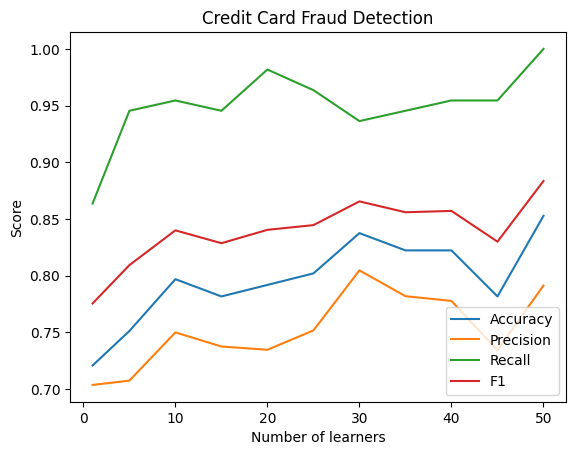

Learners: 1 --> Accuracy: 0.72, Precision: 0.70, Recall: 0.86, F1: 0.78
Learners: 5 --> Accuracy: 0.75, Precision: 0.71, Recall: 0.95, F1: 0.81
Learners: 10 --> Accuracy: 0.80, Precision: 0.75, Recall: 0.95, F1: 0.84
Learners: 15 --> Accuracy: 0.78, Precision: 0.74, Recall: 0.95, F1: 0.83
Learners: 20 --> Accuracy: 0.79, Precision: 0.73, Recall: 0.98, F1: 0.84
Learners: 25 --> Accuracy: 0.80, Precision: 0.75, Recall: 0.96, F1: 0.84
Learners: 30 --> Accuracy: 0.84, Precision: 0.80, Recall: 0.94, F1: 0.87
Learners: 35 --> Accuracy: 0.82, Precision: 0.78, Recall: 0.95, F1: 0.86
Learners: 40 --> Accuracy: 0.82, Precision: 0.78, Recall: 0.95, F1: 0.86
Learners: 45 --> Accuracy: 0.78, Precision: 0.73, Recall: 0.95, F1: 0.83
Learners: 50 --> Accuracy: 0.85, Precision: 0.79, Recall: 1.00, F1: 0.88


In [17]:
learners = np.arange(0, 51, 5)
learners[0] = 1
accuracy = []
precision = []
recall = []
f1 = []
for n in learners:
    ada_clf = AdaBoostClassifier(X_train, y_train, n)
    y_pred = ada_clf(X_test)
    y_pred[y_pred==-1] = 0
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

plt.plot(learners, accuracy, label='Accuracy')
plt.plot(learners, precision, label='Precision')
plt.plot(learners, recall, label='Recall')
plt.plot(learners, f1, label='F1')
plt.xlabel('Number of learners')
plt.ylabel('Score')
plt.title('Credit Card Fraud Detection')
plt.legend()

plt.show()

for num_learners,a,p,r,f in zip(learners, accuracy, precision, recall, f1):
    print(f'Learners: {num_learners} --> Accuracy: {a:.2f}, Precision: {p:.2f}, Recall: {r:.2f}, F1: {f:.2f}')

# Dataset 1: Telco Customer Churn

In [18]:
df1 = pd.read_csv(data1_path)
df1.describe(include='all') 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
df1 = df1.drop('customerID', axis=1)
y = df1['Churn']
X = df1.drop('Churn', axis=1)
# convert TotalCharges to numeric
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
print(f'Categorical columns: {categorical_cols}')
print(f'Numerical columns: {numerical_cols}')
my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [22]:
# find cols in df1 that contain null values, print them out
print('Columns with null values:')
print(df1.columns[df1.isnull().any()].tolist())
# find cols in df1 that contain empty values, print them out
print('Columns with empty values:')
print(df1.columns[(df1 == ' ').any()].tolist())
# print indices of rows with empty values
print('Rows with empty values:')
print(df1.index[(df1 == ' ').any(axis=1)].tolist())


Columns with null values:
[]
Columns with empty values:
['TotalCharges']
Rows with empty values:
[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [24]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [25]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
# prepend column of 1s for bias, don't add header
bias_train = pd.DataFrame(np.ones((X_train_preprocessed.shape[0],1)))
X_train_preprocessed = pd.concat([bias_train, X_train_preprocessed], axis=1)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
bias_test = pd.DataFrame(np.ones((X_test_preprocessed.shape[0],1)))
X_test_preprocessed = pd.concat([bias_test, X_test_preprocessed], axis=1)

In [26]:
y_train_preprocessed = y_train.replace({'No': 0, 'Yes': 1})
y_test_preprocessed = y_test.replace({'No': 0, 'Yes': 1})


In [27]:
X_train_preprocessed.columns

Index([ 0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
      dtype='int64')

In [28]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train_preprocessed, y_train_preprocessed)

# use linear regresison
from sklearn.linear_model import LogisticRegression as LR
model = LR(random_state=42)
model.fit(X_train_preprocessed, y_train_preprocessed)


LogisticRegression(random_state=42)

In [29]:
y_pred = model.predict(X_test_preprocessed)
y_pred = np.round(y_pred)
arr = y_test_preprocessed.to_numpy()
print(f"Accuracy: {accuracy_score(arr, y_pred):.2f}")
print(f"Precision: {precision_score(arr, y_pred):.2f}")
print(f"Recall: {recall_score(arr, y_pred):.2f}")
print(f"F1: {f1_score(arr, y_pred):.2f}")

Accuracy: 0.82
Precision: 0.69
Recall: 0.60
F1: 0.64


 40%|████      | 2/5 [00:00<00:00, 11.23it/s]

100%|██████████| 50/50 [00:02<00:00, 19.50it/s]


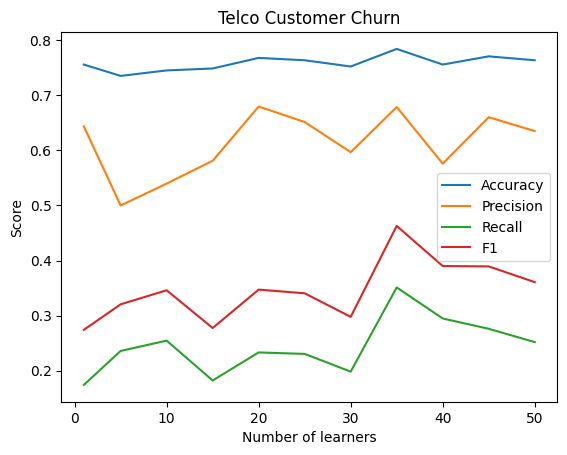

Learners: 1 --> Accuracy: 0.76, Precision: 0.64, Recall: 0.17, F1: 0.27
Learners: 5 --> Accuracy: 0.74, Precision: 0.50, Recall: 0.24, F1: 0.32
Learners: 10 --> Accuracy: 0.75, Precision: 0.54, Recall: 0.25, F1: 0.35
Learners: 15 --> Accuracy: 0.75, Precision: 0.58, Recall: 0.18, F1: 0.28
Learners: 20 --> Accuracy: 0.77, Precision: 0.68, Recall: 0.23, F1: 0.35
Learners: 25 --> Accuracy: 0.76, Precision: 0.65, Recall: 0.23, F1: 0.34
Learners: 30 --> Accuracy: 0.75, Precision: 0.60, Recall: 0.20, F1: 0.30
Learners: 35 --> Accuracy: 0.78, Precision: 0.68, Recall: 0.35, F1: 0.46
Learners: 40 --> Accuracy: 0.76, Precision: 0.58, Recall: 0.29, F1: 0.39
Learners: 45 --> Accuracy: 0.77, Precision: 0.66, Recall: 0.28, F1: 0.39
Learners: 50 --> Accuracy: 0.76, Precision: 0.64, Recall: 0.25, F1: 0.36


In [30]:
learners = np.arange(0, 51, 5)
learners[0] = 1
accuracy = []
precision = []
recall = []
f1 = []
for n in learners:
    ada_clf = AdaBoostClassifier(X_train_preprocessed, y_train_preprocessed, n)
    y_pred = ada_clf(X_test_preprocessed)
    y_pred[y_pred==-1] = 0
    accuracy.append(accuracy_score(arr, y_pred))
    precision.append(precision_score(arr, y_pred))
    recall.append(recall_score(arr, y_pred))
    f1.append(f1_score(arr, y_pred))

plt.plot(learners, accuracy, label='Accuracy')
plt.plot(learners, precision, label='Precision')
plt.plot(learners, recall, label='Recall')
plt.plot(learners, f1, label='F1')
plt.xlabel('Number of learners')
plt.ylabel('Score')
plt.title('Telco Customer Churn')
plt.legend()

plt.show()

for num_learners,a,p,r,f in zip(learners, accuracy, precision, recall, f1):
    print(f'Learners: {num_learners} --> Accuracy: {a:.2f}, Precision: {p:.2f}, Recall: {r:.2f}, F1: {f:.2f}')

# Dataset 2: Adult Census Income

In [31]:
df2 = pd.read_csv(data2_path, names=df2_headers, index_col=False)
df2_extra = pd.read_csv(data2_extra, names=df2_headers, index_col=False)
df2 = pd.concat([df2, df2_extra])
# replace all ?s with NaNs
df2 = df2.replace(' ?', np.nan)
df2.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48843.0,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,147.0,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,4
top,36.0,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,898.0,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,NaN,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,NaN,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,NaN,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,NaN,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,NaN,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,NaN,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [32]:
df2.isnull().sum()

age                  0
workclass         2800
fnlwgt               1
education            1
education-num        1
marital-status       1
occupation        2810
relationship         1
race                 1
sex                  1
capital-gain         1
capital-loss         1
hours-per-week       1
native-country     858
income               1
dtype: int64

48843


<Axes: >

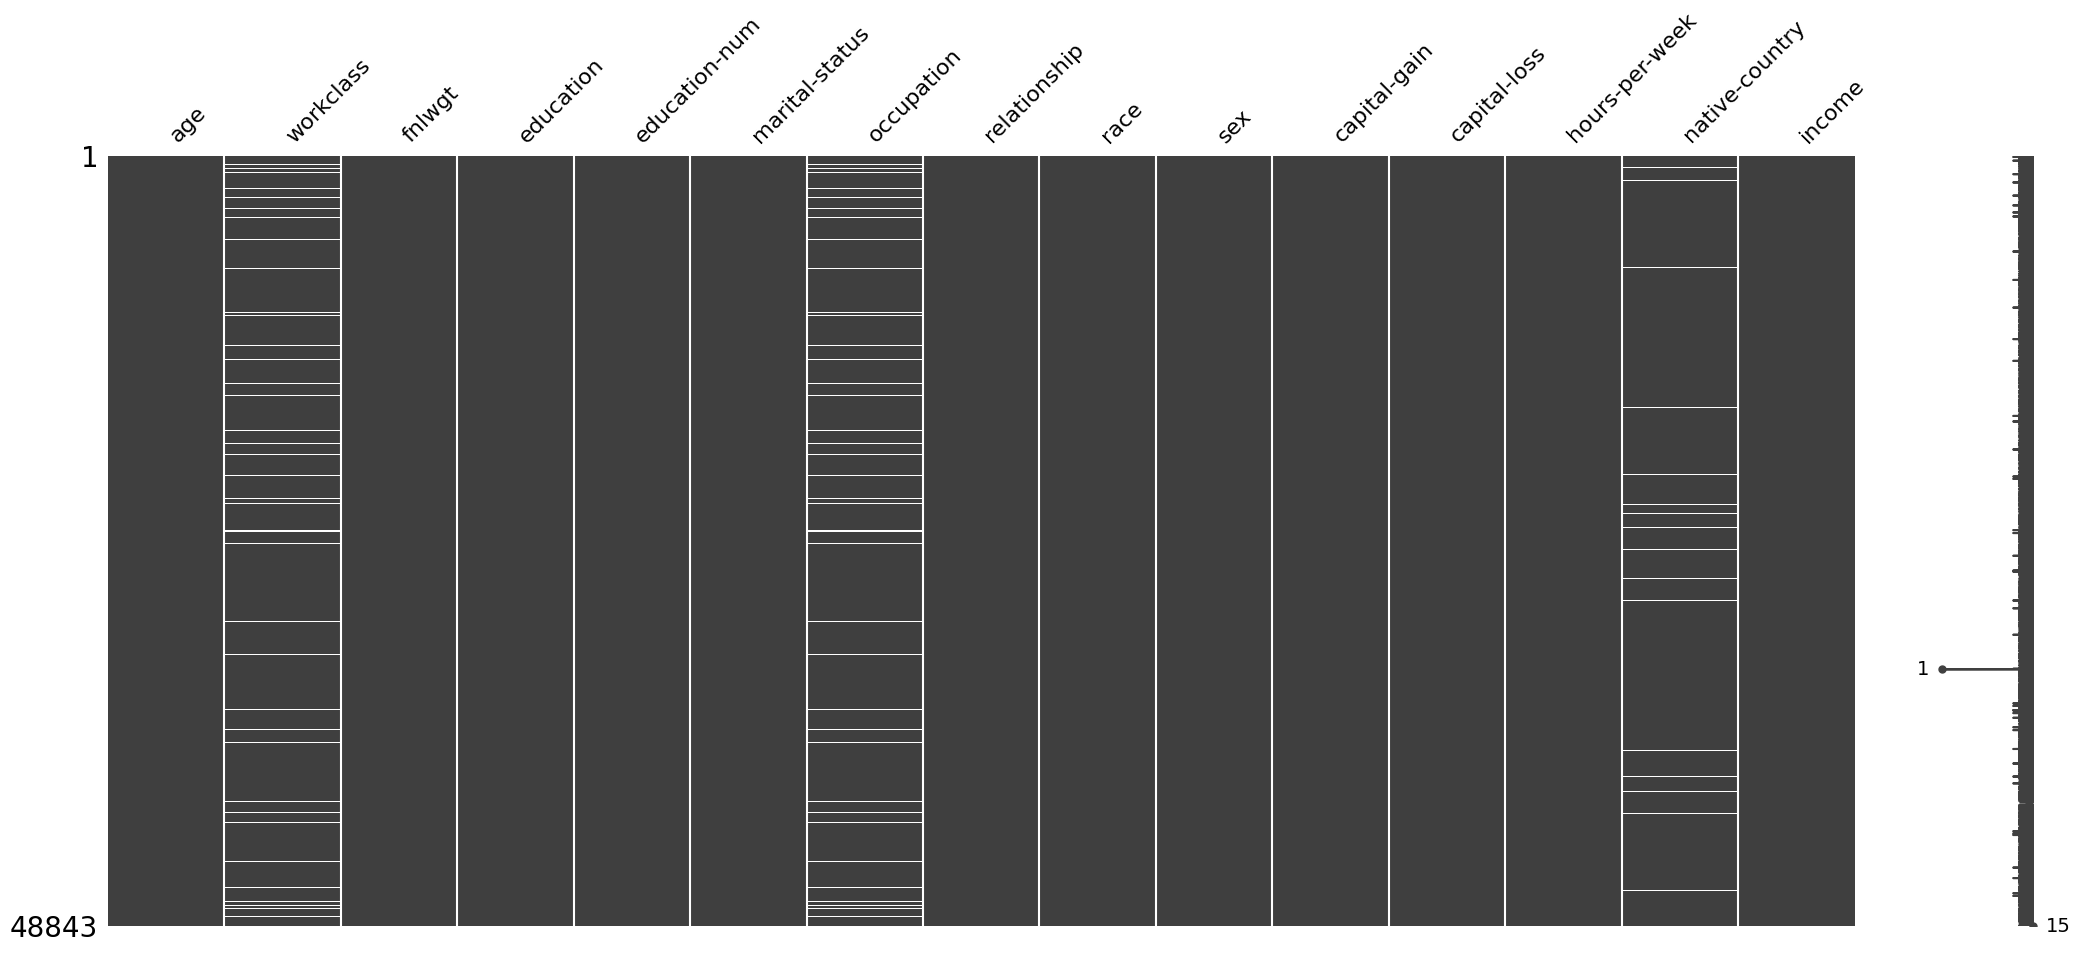

In [33]:
import missingno as msno
print(len(df2))
msno.matrix(df2)

In [34]:
# print the categories on Income column along with their frequencies
print(df2['income'].value_counts())
# merge the categories <=50K and <=50K. into one category <=50K
# do the same for >50K and >50K.
df2['income'] = df2['income'].replace({' <=50K.': ' <=50K', ' >50K.': ' >50K'})
print(df2['income'].value_counts())

income
 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: count, dtype: int64
income
 <=50K    37155
 >50K     11687
Name: count, dtype: int64


In [35]:
df2['native-country'].value_counts()

native-country
 United-States                 43832
 Mexico                          951
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 Peru                  

In [36]:
# categorize countries
# north_america = [' United-States', ' Canada', ' Cuba', ' Dominican-Republic', ' El-Salvador', ' Outlying-US(Guam-USVI-etc)', ' Guatemala', ' Haiti', ' Honduras', ' Jamaica', ' Mexico', ' Nicaragua', ' Puerto-Rico', ' Trinadad&Tobago']
# south_america = [' Ecuador', ' Peru', ' Columbia']
# asia = [' Cambodia', ' China', ' Hong', ' India', ' Iran', ' Japan', ' Laos', ' Philippines', ' Taiwan', ' Thailand', ' Vietnam']
# europe = [' England', ' France', ' Germany', ' Greece', ' Holand-Netherlands', ' Hungary', ' Ireland', ' Italy', ' Poland', ' Portugal', ' Scotland', ' Yugoslavia']
# other = [' ?', ' South']

# df2['native-country'] = df2['native-country'].replace(north_america, 'North-America')
# df2['native-country'] = df2['native-country'].replace(south_america, 'South-America')
# df2['native-country'] = df2['native-country'].replace(asia, 'Asia')
# df2['native-country'] = df2['native-country'].replace(europe, 'Europe')
# df2['native-country'] = df2['native-country'].replace(other, 'Other')

# df2['native-country'].value_counts()

# categorize countries by richest, medium, poorest
richest = [' United-States',' Canada' ,' England', ' France', ' Japan' ,' Germany', ' Greece', ' Holand-Netherlands', ' Hungary', ' Ireland', ' Italy', ' Poland', ' Portugal', ' Scotland']
medium = [' Cuba', ' China' ,' Taiwan' ,' Dominican-Republic', ' El-Salvador', ' Iran', ' Outlying-US(Guam-USVI-etc)', ' Guatemala', ' Haiti', ' Honduras', ' Jamaica', ' Mexico', ' Nicaragua', ' Puerto-Rico', ' Trinadad&Tobago', ' Ecuador', ' Peru', ' Columbia']
poorest = [' Cambodia', ' Hong', ' India', ' Laos', ' Philippines', ' Thailand', ' Vietnam']
others = [' ?', ' South', ' Yugoslavia']

df2['native-country'] = df2['native-country'].replace(richest, 'Richest')
df2['native-country'] = df2['native-country'].replace(medium, 'Medium')
df2['native-country'] = df2['native-country'].replace(poorest, 'Poorest')
df2['native-country'] = df2['native-country'].replace(others, 'Other')
df2['native-country'].value_counts()

native-country
Richest    44863
Medium      2341
Poorest      643
Other        138
Name: count, dtype: int64

In [37]:
# convert age to numeric
df2['age'] = pd.to_numeric(df2['age'], errors='coerce')
# drop the row where age is NaN
df2 = df2.dropna(subset=['age'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   workclass       46043 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  object 
 6   occupation      46033 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  47985 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(6), object(9)
memory usage: 6.0+ MB


In [38]:
# remove all rows with NaNs
# df2 = df2.dropna()
# df2.info()

In [39]:
X, y = df2.drop('income', axis=1), df2['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
print(f'Categorical columns: {categorical_cols}')
print(f'Numerical columns: {numerical_cols}')

Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
Numerical columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [40]:
my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

In [41]:
from sklearn.preprocessing import StandardScaler
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [43]:
preds = my_pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds):.2f}")
print(f"Precision: {precision_score(y_test, preds, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, preds, average='weighted'):.2f}")
print(f"F1: {f1_score(y_test, preds, average='weighted'):.2f}")


Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1: 0.85


In [44]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
Y_train = y_train.replace({' <=50K': 0, ' >50K': 1})
Y_test = y_test.replace({' <=50K': 0, ' >50K': 1})


X_train = pd.DataFrame(X_train)
# prepend column of 1s for bias, add 'bias' as the header for the column
bias_train = pd.DataFrame(np.ones((X_train.shape[0],1)), columns=['bias'])
X_train = pd.concat([bias_train, X_train], axis=1)
X_test = pd.DataFrame(X_test)
bias_test = pd.DataFrame(np.ones((X_test.shape[0],1)), columns=['bias'])
X_test = pd.concat([bias_test, X_test], axis=1)


In [45]:
# Vary learners from 1 to 50 in steps of 5, and plot the accuracy, precision, recall and F1 scores on the test set
learners = np.arange(0, 50, 5)
learners[0] = 1
accuracy = []
precision = []
recall = []
f1 = []
for n in learners:
    ada_clf = AdaBoostClassifier(X_train, Y_train, n)
    y_pred = ada_clf(X_test)
    y_pred[y_pred==-1] = 0
    accuracy.append(accuracy_score(Y_test, y_pred))
    precision.append(precision_score(Y_test, y_pred))
    recall.append(recall_score(Y_test, y_pred))
    f1.append(f1_score(Y_test, y_pred))

plt.plot(learners, accuracy, label='Accuracy')
plt.plot(learners, precision, label='Precision')
plt.plot(learners, recall, label='Recall')
plt.plot(learners, f1, label='F1')
plt.xlabel('Number of learners')
plt.ylabel('Score')
plt.title('Adult Income Prediction')
plt.legend()

plt.show()

for num_learners,a,p,r,f in zip(learners, accuracy, precision, recall, f1):
    print(f'Learners: {num_learners} --> Accuracy: {a:.2f}, Precision: {p:.2f}, Recall: {r:.2f}, F1: {f:.2f}')

 92%|█████████▏| 23/25 [00:04<00:00,  4.15it/s]

In [ ]:
# check class balance by counting 0s and 1s
print(f'0s: {sum(Y_train==0)}')
print(f'1s: {sum(Y_train==1)}')


0s: 29741
1s: 9332


In [ ]:
# use top 20 features from X_train
selected_features = feature_selection(X_train, Y_train, 10)
X_train = X_train[selected_features]
X_test = X_test[selected_features]
ada_clf = AdaBoostClassifier(X_train, Y_train, 50)
y_pred = ada_clf(X_test)
y_pred[y_pred==-1] = 0
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.2f}")
print(f"Precision: {precision_score(Y_test, y_pred):.2f}")
print(f"Recall: {recall_score(Y_test, y_pred):.2f}")
print(f"F1: {f1_score(Y_test, y_pred):.2f}")


Categorical columns: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
Numerical columns: [0, 1, 2, 3, 4, 5]


100%|██████████| 50/50 [00:04<00:00, 10.38it/s]

Accuracy: 0.80
Precision: 0.59
Recall: 0.51
F1: 0.54
